N/LAB Platinum Deposit Customer Prediction Model

Random Forest


The Model that has been choosen for prediction


Descriptive Statistics for Numerical Variables:
               age       balance          day     duration    campaign  \
count  4000.000000   4000.000000  4000.000000  4000.000000  4000.00000   
mean     41.202500   1365.603500    15.892000   295.182250     2.65625   
std      10.999738   2724.420654     8.438936   287.750331     3.10419   
min      18.000000  -1884.000000     1.000000     1.000000     1.00000   
25%      33.000000     86.000000     8.000000   114.000000     1.00000   
50%      39.000000    465.000000    16.000000   202.500000     2.00000   
75%      49.000000   1457.250000    22.000000   364.000000     3.00000   
max      92.000000  56831.000000    31.000000  2770.000000    58.00000   

            pdays     previous  
count  4000.00000  4000.000000  
mean     43.83825     0.616750  
std     102.89674     1.825843  
min      -1.00000     0.000000  
25%      -1.00000     0.000000  
50%      -1.00000     0.000000  
75%      -1.00000     0.000000  
max     854.00000   

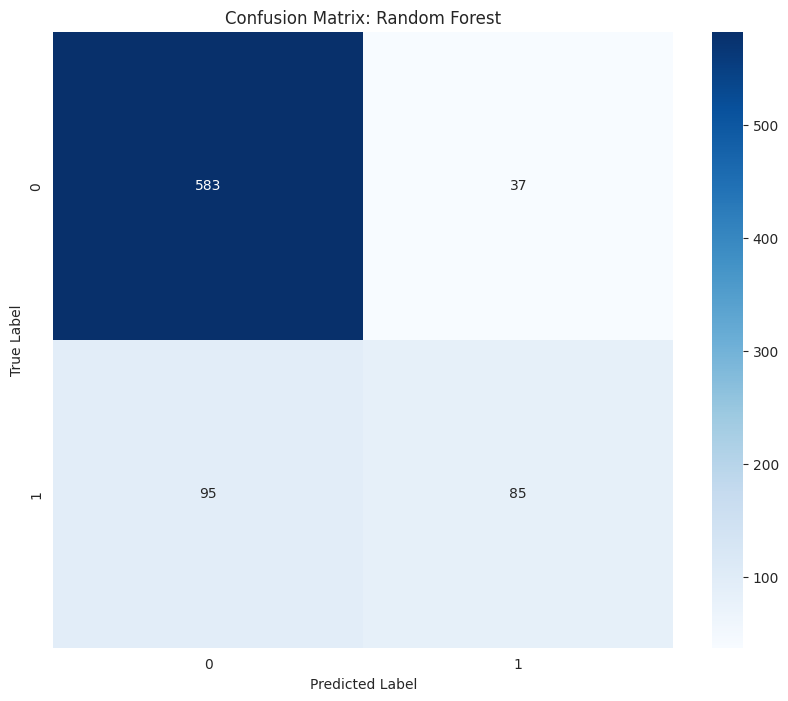

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the dataset
file_path = r"/content/cwk_data_20703562.csv"  # Update this with your dataset path
data = pd.read_csv(file_path)

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Variables:")
print(data.describe())

# Check Missing Values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values Percentage:")
print(missing_percentage[missing_percentage > 0])

# Step 3: Preprocess the dataset
# Define feature matrix (X) and target variable (y)
X = data.drop(columns=['y'])  # Drop the target variable column ('y') from the dataset
y = data['y'].map({'yes': 1, 'no': 0})  # Convert target variable to binary (1 for 'yes', 0 for 'no')

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/one-hot encoding

# Step 4: Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize Random Forest model with parameterization
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees in the forest
    max_depth=10,        # Maximum depth of each tree
    min_samples_split=2, # Minimum samples required to split an internal node
    min_samples_leaf=1,  # Minimum samples required to be at a leaf node
    random_state=42,     # Ensure reproducibility
    n_jobs=-1            # Use all processors for parallel computation
)

# Step 6: Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='accuracy')

# Step 7: Train the model on the training set
rf_model.fit(X_train, Y_train)

# Step 8: Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Step 9: Compute performance metrics
accuracy = accuracy_score(Y_test, rf_predictions)
precision = precision_score(Y_test, rf_predictions)
recall = recall_score(Y_test, rf_predictions)
f1 = f1_score(Y_test, rf_predictions)
conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Step 10: Display results
print("Random Forest Results:")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Step 11: Display the confusion matrix as a heatmap
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)  # Plot the heatmap

# Step 12: Add titles and axis labels
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Step 13: Show the heatmap
plt.show()
#Used the help of Chatgpt